<a href="https://colab.research.google.com/github/meenamahanth/DataScience/blob/main/NLP/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Sentiment Analysis</h1>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

Add the sentimentdataset.csv in the files tab you can get it from the below link

In [2]:
data = pd.read_csv('sentimentdataset.csv') # https://github.com/meenamahanth/DataScience/blob/main/NLP/sentimentdataset.csv CTRL + Click to open

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Taking the Text and Sentiment Column

In [4]:
data = data[['Text','Sentiment']]

In [5]:
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [6]:
data.shape

(732, 2)

As it contains differnt types we convert them into positive,negative,neutral

In [7]:
data['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [8]:
# # Clean sentiment column (strip extra spaces) as the data contain a space in front of it
data["Sentiment"] = data["Sentiment"].str.strip()

In [9]:
data.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


As we need only positive and negative words we are converting the other terms into the negative and positive words with the TextBlob library by finding polarity of the sentences

In [10]:
import pandas as pd
from textblob import TextBlob

# Sentiment labeling function
def get_sentiment(word):
    polarity = TextBlob(str(word)).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply to the column
data['Sentiment'] = data['Text'].apply(get_sentiment)

# Preview the results
print(data.head(20))

                                                 Text Sentiment
0    Enjoying a beautiful day at the park!        ...  positive
1    Traffic was terrible this morning.           ...  negative
2    Just finished an amazing workout! 💪          ...  positive
3    Excited about the upcoming weekend getaway!  ...  positive
4    Trying out a new recipe for dinner tonight.  ...  positive
5    Feeling grateful for the little things in lif...  negative
6    Rainy days call for cozy blankets and hot coc...  positive
7    The new movie release is a must-watch!       ...  positive
8    Political discussions heating up on the timel...   neutral
9    Missing summer vibes and beach days.         ...  negative
10   Just published a new blog post. Check it out!...  positive
11   Feeling a bit under the weather today.       ...   neutral
12   Exploring the city's hidden gems.            ...  negative
13   New year, new fitness goals! 💪               ...  positive
14   Technology is changing the way we l

Checking the null values

In [11]:
data.isnull().sum()

,0
Text,0
Sentiment,0


As there are no null values , next procedding to the train and test

In [12]:
# Splitiing the data into training and testing datasets
train ,test = train_test_split(data,test_size=0.1)

In [13]:
train = train[train.Sentiment != 'neutral']

In [14]:
train

,Text,Sentiment
717,Participating in a debate club to enhance crit...,positive
570,"Underneath the city lights, the dancer express...",positive
663,Trying to set a new trend by juggling textbook...,positive
80,Overflowing happiness: welcoming a new family...,positive
209,"Numb to the chaos, emotions locked away, a st...",negative
...,...,...
32,Coding a new project with enthusiasm. ...,positive
412,Contentment envelops as the aroma of freshly b...,positive
365,Optimism for a bright future amidst challengin...,positive
132,Enthusiasm for a creative project in the maki...,positive


In [15]:
train['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [16]:
train_positive = train[ train['Sentiment'] == 'positive']
train_positive = train_positive['Text']
train_negative = train[ train['Sentiment'] == 'negative']
train_negative = train_negative['Text']

In [17]:
train_positive

,Text
717,Participating in a debate club to enhance crit...
570,"Underneath the city lights, the dancer express..."
663,Trying to set a new trend by juggling textbook...
80,Overflowing happiness: welcoming a new family...
703,Missing out on a long-anticipated event due to...
...,...
82,Sending love to all my followers on this beau...
32,Coding a new project with enthusiasm. ...
412,Contentment envelops as the aroma of freshly b...
365,Optimism for a bright future amidst challengin...


Positive words


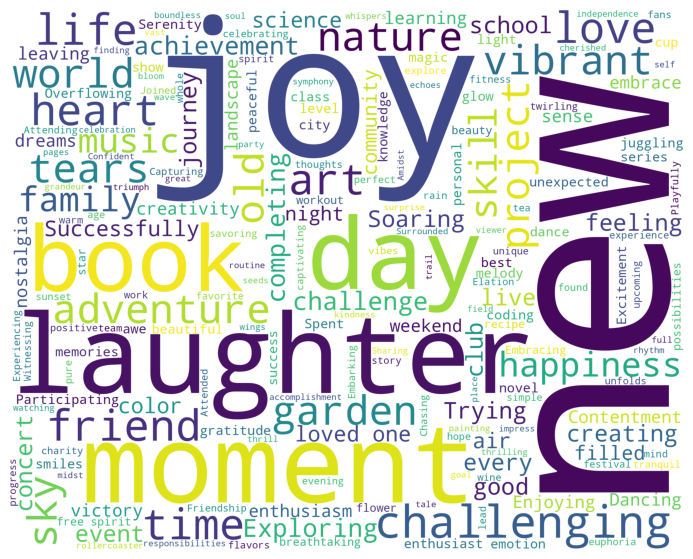

Negative words


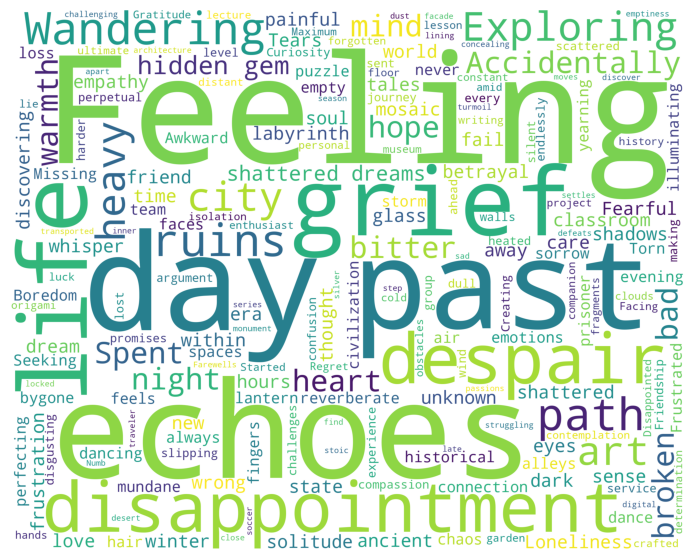

In [18]:
def wordcloud_draw(data,color = 'white'):
  words = ' '.join(data)
  cleaned_word = " ".join([word for word in words.split() if 'http'not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
  wordcloud = WordCloud(stopwords = STOPWORDS,background_color = color,width = 2500,height = 2000).generate(cleaned_word)
  plt.figure(1,figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
print('Positive words')
wordcloud_draw(train_positive,'white')
print('Negative words')
wordcloud_draw(train_negative)

Analysing the test set

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
tweets = []
stopwords_set = set(stopwords.words('english'))
for index,row in train.iterrows():
  words_filtered = [e.lower() for e in row.Text.split() if len(e) >=3]
  words_cleaned = [word for word in words_filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
  words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
  tweets.append((words_cleaned,row.Sentiment))
test_pos = test[test['Sentiment'] == 'positive']
test_pos = test_pos['Text']

In [21]:
test_positive = test[ test['Sentiment'] == 'positive']
test_positive = test_positive['Text']
test_negative = test[ test['Sentiment'] == 'negative']
test_negative = test_negative['Text']

In [22]:
# Extracting the features of words
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


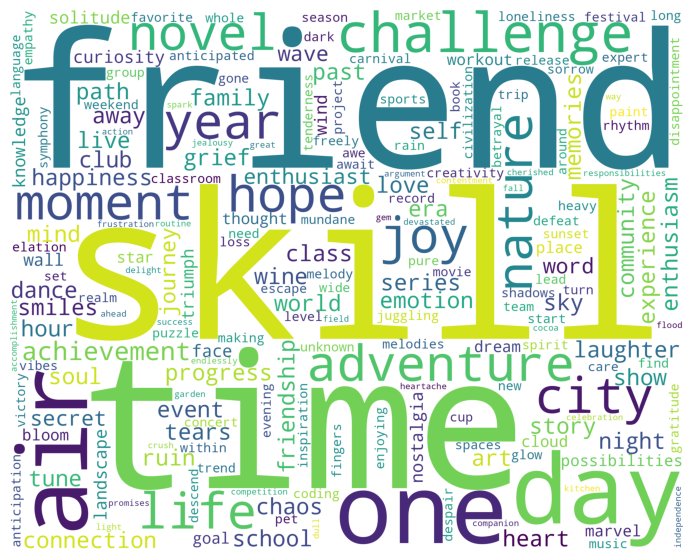

In [23]:
wordcloud_draw(w_features)

Naive Bayes Method for complete sentimental analysis

In [24]:
# Using Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [25]:
classifier.show_most_informative_features(10)

Most Informative Features
     contains(shattered) = True           negati : positi =     11.4 : 1.0
  contains(accidentally) = True           negati : positi =      6.9 : 1.0
       contains(despair) = True           negati : positi =      5.3 : 1.0
         contains(fail:) = True           negati : positi =      5.3 : 1.0
     contains(labyrinth) = True           negati : positi =      5.3 : 1.0
        contains(mosaic) = True           negati : positi =      5.3 : 1.0
          contains(path) = True           negati : positi =      5.3 : 1.0
        contains(winter) = True           negati : positi =      5.3 : 1.0
        contains(echoes) = True           negati : positi =      4.9 : 1.0
           contains(new) = True           positi : negati =      4.4 : 1.0


On Test data

In [26]:
negative_count = 0
positive_count = 0
for obj in test_negative:
  res = classifier.classify(extract_features(obj.split()))
  if(res == 'negative'):
    negative_count = negative_count + 1
for obj in test_positive:
  res = classifier.classify(extract_features(obj.split()))
  if(res == 'positive'):
    positive_count = positive_count + 1

print('[negative]: %s/%s '% (len(test_negative),negative_count))
print('[positive]: %s/%s '% (len(test_positive),positive_count))

[negative]: 16/5 
[positive]: 29/26 


On Train set

In [27]:
negative_count = 0
positive_count = 0
for obj in train_negative:
  res = classifier.classify(extract_features(obj.split()))
  if(res == 'negative'):
    negative_count = negative_count + 1
for obj in train_positive:
  res = classifier.classify(extract_features(obj.split()))
  if(res == 'positive'):
    positive_count = positive_count + 1

print('[negative]: %s/%s '% (len(train_negative),negative_count))
print('[positive]: %s/%s '% (len(train_positive),positive_count))

[negative]: 110/100 
[positive]: 253/252 


<center><h1>Sentiment Analysis on the another dataset that contain text and Sentiment </h1><center>

Import the libraries

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

Add the sentiment_analysis.csv in the files tab you can get it from the below link

In [29]:
data = pd.read_csv('sentiment_analysis.csv') # https://github.com/meenamahanth/DataScience/blob/main/NLP/sentiment_analysis.csv

In [30]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


Checking is there any null values

In [31]:
data.isnull().sum() # if null values persists then data.dropna(inplace=True)

,0
Year,0
Month,0
Day,0
Time of Tweet,0
text,0
sentiment,0
Platform,0


Taking only the two columns text and sentiment

In [32]:
data = data[['text','sentiment']]

In [33]:
data.shape

(499, 2)

In [34]:
data['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

No need of creating the polarity test with **TextBlob Library** as it only contains postive,neutral,negative.Next proceeding to train and test

In [35]:
train,test = train_test_split(data,test_size=0.2,random_state=42)

Removing the neutral

In [36]:
train = train[train.sentiment !='neutral']

Train set

In [37]:
train.head()

,text,sentiment
56,"I have bad headech, what I need to do now",negative
227,happy mother`s day to all the mothers in the w...,positive
280,Getting ready for week Its too nice today to ...,positive
220,"Errors are red but my life is blue, I love ros...",positive
448,I don`t want to sit at home on prom night. Som...,negative


In [38]:
train['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [39]:
train_positive = train[ train['sentiment'] == 'positive']
train_positive = train_positive['text']
train_negative = train[ train['sentiment'] == 'negative']
train_negative = train_negative['text']

In [40]:
train_positive

,text
227,happy mother`s day to all the mothers in the w...
280,Getting ready for week Its too nice today to ...
220,"Errors are red but my life is blue, I love ros..."
422,a mouth for sure
25,"Its amazing game, I playing everyday"
...,...
99,That`s very funny. Cute kids.
87,"Playing with kids, its amazing"
458,Wow what a beautiful picture... and by the ...
466,Off to Woolsery this morning to (hopefully) se...


In [41]:
train_positive.shape

(132,)

In [42]:
train_negative

,text
56,"I have bad headech, what I need to do now"
448,I don`t want to sit at home on prom night. Som...
376,aww I miss driving down elmwood
154,I'm studying in psychology
403,I wish I could get my nails done stupid job
...,...
498,"actually, I wish I was back in Tahoe. I miss..."
188,"Felt like ****, behaved like my son; ate to co..."
348,I only do computers. Am hopeless at everythin...
435,No waterfront anymore faccia luna and claren...


In [43]:
train_negative.shape

(98,)

Actually the Total Rows of data set is 499 <br>
where the train set has 230 and test has 100 their sum is 330 <br>
and the remaining 169 rows are considered as the neutral

In [44]:
test.shape

(100, 2)

<h2> Analysis on the train data </h2>

In [45]:
train.shape

(230, 2)

Positive words wordscloud


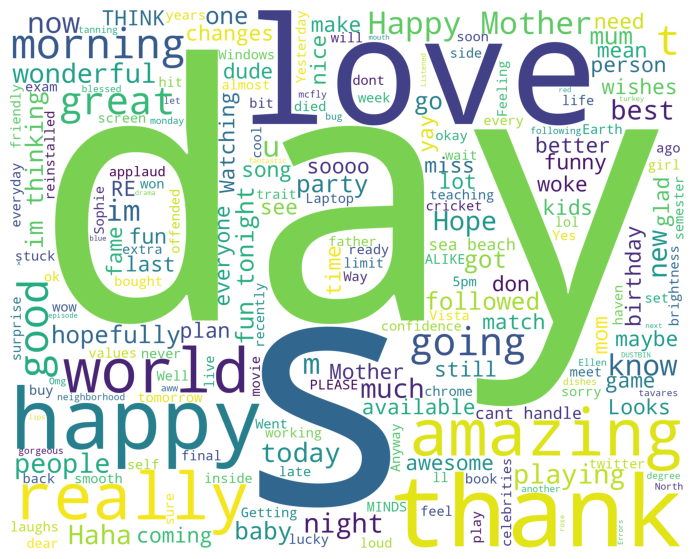

Negative words wordscloud


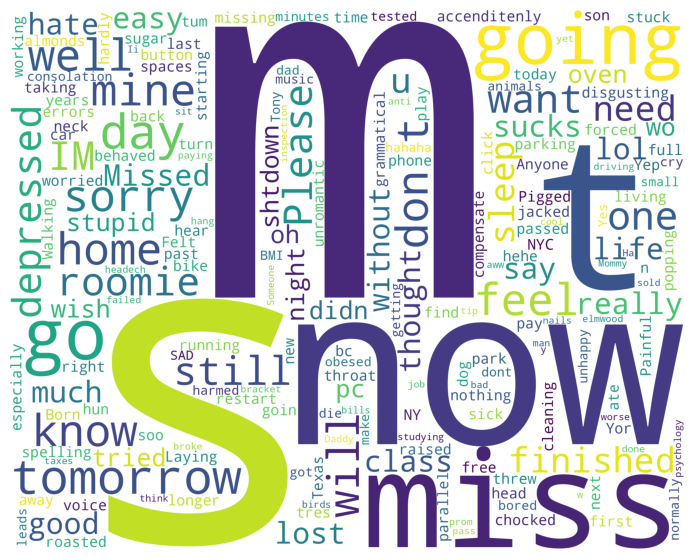

In [46]:
def wordcloud_draw(data,color='white'):
  words =' '.join(data)
  cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('#') and not word.startswith('@') and word != 'RT'])
  wordcloud = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
  plt.figure(1,figsize=(10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

print('Positive words wordscloud')
wordcloud_draw(train_positive,'white')
print('Negative words wordscloud')
wordcloud_draw(train_negative)

Analysis on the test data

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
feedback = []
stopwords_set = set(stopwords.words('english'))
for index,row in train.iterrows():
  words_filtered = [e.lower() for e in row.text.split() if len(e) >=3]
  words_cleaned = [word for word in words_filtered if 'http' not in word and not word.startswith('#') and not word.startswith('@') and word != 'RT']
  words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
  feedback.append((words_cleaned,row.sentiment))

In [49]:
test_positive = test[ test['sentiment'] == 'positive']
test_positive = test_positive['text']
test_negative = test[ test['sentiment'] == 'negative']
test_negative = test_negative['text']

In [50]:
def get_words_in_feedback(feedback):
  all = []
  for (words,sentiment) in feedback:
    all.extend(words)
  return all

def get_word_features(wordlist):
  wordlist = nltk.FreqDist(wordlist)
  features = wordlist.keys()
  return features

w_features = get_word_features(get_words_in_feedback(feedback))

def extract_features(document):
  document_words = set(document)
  features = {}
  for word in w_features:
    features['contains(%s)' % word] = (word in document_words)
  return features

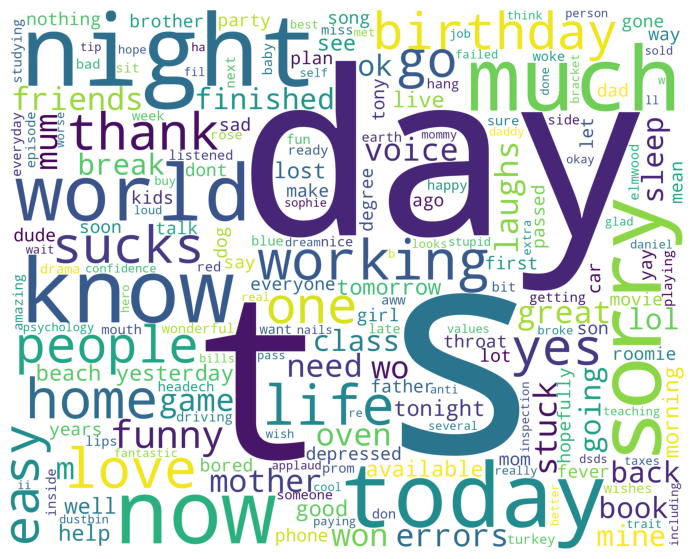

In [51]:
wordcloud_draw(w_features)

Naive Bayes Method for complete sentimental analysis

In [52]:
training_set = nltk.classify.apply_features(extract_features,feedback)
classifier = nltk.NaiveBayesClassifier.train(training_set)
classifier.show_most_informative_features(10)

Most Informative Features
           contains(day) = True           positi : negati =      4.9 : 1.0
          contains(want) = True           negati : positi =      4.0 : 1.0
          contains(your) = True           negati : positi =      4.0 : 1.0
           contains(all) = True           positi : negati =      3.7 : 1.0
           contains(fun) = True           positi : negati =      3.7 : 1.0
           contains(i`m) = True           negati : positi =      3.4 : 1.0
          contains(that) = True           positi : negati =      3.3 : 1.0
         contains(can`t) = True           negati : positi =      3.1 : 1.0
          contains(down) = True           negati : positi =      3.1 : 1.0
           contains(lol) = True           negati : positi =      3.1 : 1.0


On the train set

In [53]:
# Postive and negative count on the train set
positive_count = 0
negative_count = 0
for objct in train_negative:
  res = classifier.classify(extract_features(objct.split()))
  if res == 'negative':
    negative_count = negative_count + 1

for objct in train_positive:
  res = classifier.classify(extract_features(objct.split()))
  if res == 'positive':
    positive_count = positive_count + 1

print("Positive Count :",positive_count)
print("Negative Count :",negative_count)
# For percentage
print('[negative count ]: %s/%s '% (len(train_negative),negative_count))
print('[positive count ]: %s/%s '% (len(train_positive),positive_count))

Positive Count : 132
Negative Count : 93
[negative count ]: 98/93 
[positive count ]: 132/132 


On the test set

In [54]:
positive_count = 0
negative_count = 0
for objct in test_negative:
  res = classifier.classify(extract_features(objct.split()))
  if res == 'negative':
    negative_count = negative_count + 1

for objct in test_positive:
  res = classifier.classify(extract_features(objct.split()))
  if res == 'positive':
    positive_count = positive_count + 1

print("Positive Count :",positive_count)
print("Negative Count :",negative_count)
# For percentage
print('[negative count ]: %s/%s '% (len(test_negative),negative_count))
print('[positive count ]: %s/%s '% (len(test_positive),positive_count))

Positive Count : 30
Negative Count : 12
[negative count ]: 36/12 
[positive count ]: 34/30 
